In [51]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, f1_score

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1. Problem Statement

# 2. Data Gatharing

In [52]:
dataset = sns.load_dataset("penguins")

In [53]:
dataset.axes

[RangeIndex(start=0, stop=344, step=1),
 Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
        'flipper_length_mm', 'body_mass_g', 'sex'],
       dtype='object')]

In [54]:
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [56]:
dataset.shape

(344, 7)

# 2. EDA (Exploratory Data Analysis)

In [57]:
dataset.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [58]:
dataset.isna().sum() / len(dataset) *100

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

In [59]:
li = dataset.dtypes[dataset.dtypes == object]
a = pd.DataFrame(li)
display(a)

,0
species,object
island,object
sex,object


In [60]:
obj_col = a.index.tolist()

for i in obj_col:
    print(i, dataset[i].unique())

species ['Adelie' 'Chinstrap' 'Gentoo']
island ['Torgersen' 'Biscoe' 'Dream']
sex ['Male' 'Female' nan]


In [61]:
for i in obj_col:
    print(i, dataset[i].value_counts())

species Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64
island Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
sex Male      168
Female    165
Name: sex, dtype: int64


In [62]:
dataset.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<AxesSubplot:>

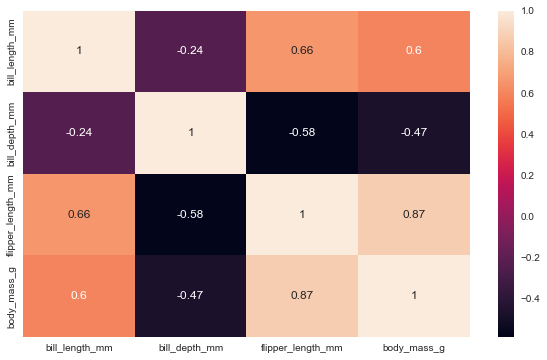

In [63]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),annot=True)

### Graphical representation of categorical counts of the data

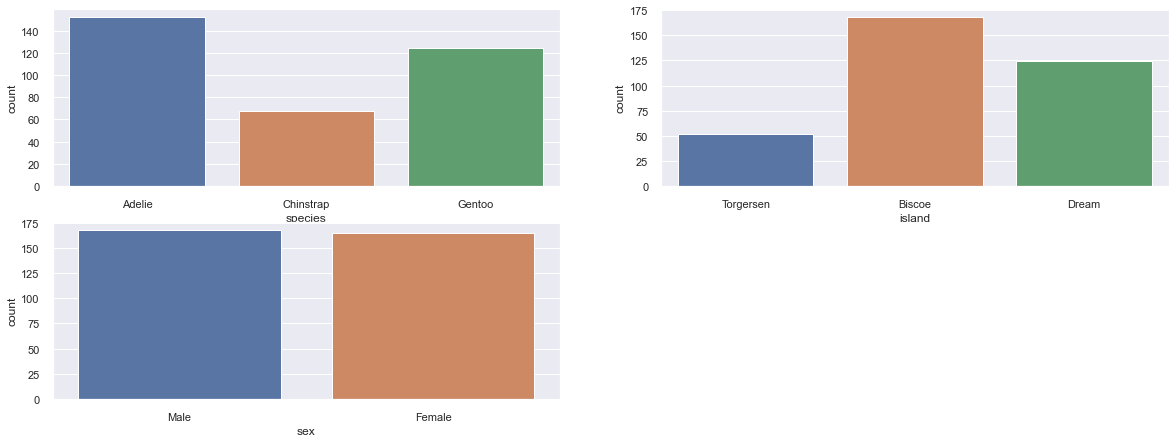

In [64]:
plt.figure(figsize=(20,15),facecolor="white")
sns.set_theme(color_codes=True)
for i in range(0,3):
    plt.subplot(4,2,i+1)
    sns.countplot(x=dataset[obj_col[i]])

### Contineous columns 
#### the variation in the data distribution.

In [65]:
cont_var = pd.DataFrame(dataset.dtypes[dataset.dtypes != object])
# sns.displot(dataset["bill_length_mm"])
conti_var = cont_var.index.tolist()

In [66]:
conti_var

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

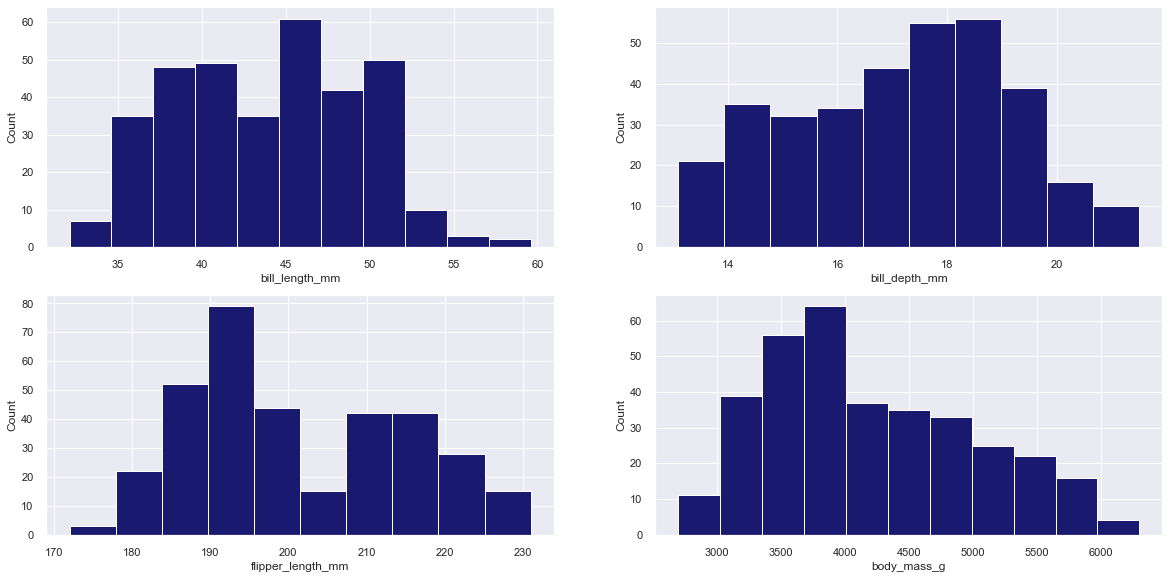

In [67]:
plt.figure(figsize=(20,15),facecolor="White")
sns.set_theme(color_codes=True)
for i in range(0,4):
    plt.subplot(3,2,i+1)
    sns.histplot(dataset[conti_var[i]],kde=False,facecolor="midnightblue")

#### Check for outliears in contineous variable

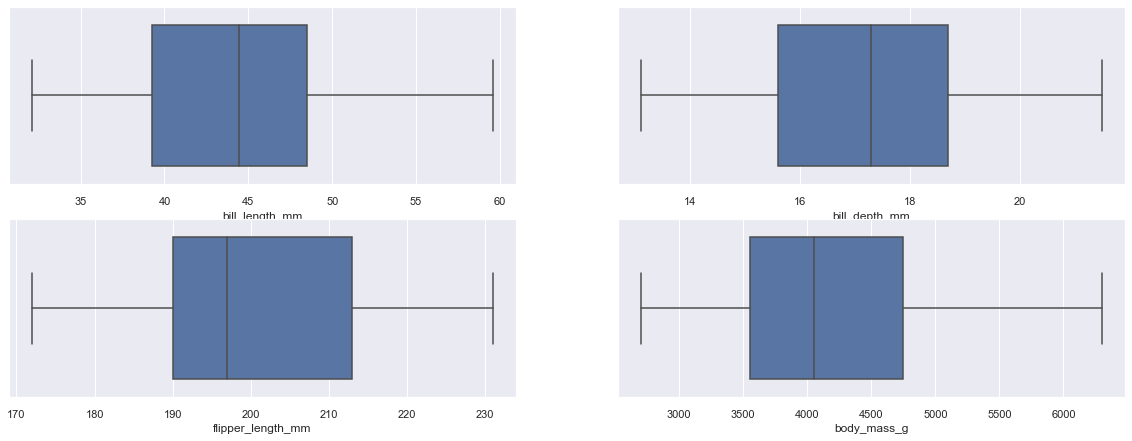

In [68]:
plt.figure(figsize=(20,15),facecolor="white")
sns.set_theme(color_codes=True)
for i in range(0,4):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=dataset[conti_var[i]])

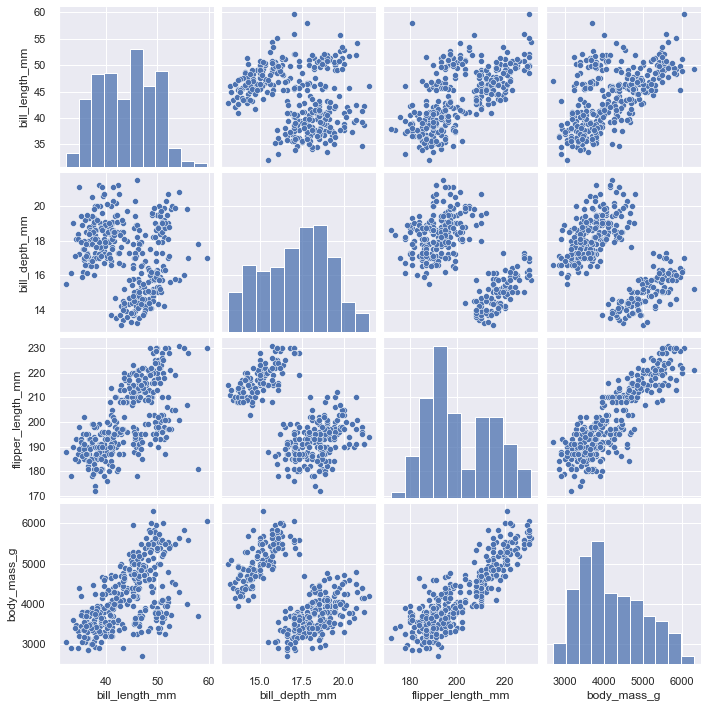

In [69]:
sns.pairplot(data=dataset)

### compairing categorical variables with target variable

In [70]:
obj_col[1:]

['island', 'sex']

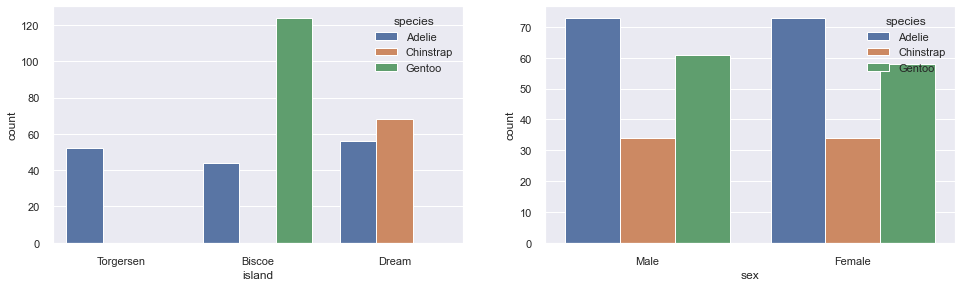

In [71]:
plt.figure(figsize=(25,20))
for i in range(1,3):
    plt.subplot(4,3,i)
    sns.countplot(x=obj_col[i], hue="species",data=dataset,)

In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [73]:
dataset["sex"] = dataset["sex"].fillna(dataset["sex"].mode()[0])

In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [75]:
from sklearn.preprocessing import LabelEncoder
lableEnc = LabelEncoder()
dataset["bill_length_mm"] = lableEnc.fit_transform(dataset["bill_length_mm"])
dataset["bill_depth_mm"] = lableEnc.fit_transform(dataset["bill_depth_mm"])
dataset["flipper_length_mm"] = lableEnc.fit_transform(dataset["flipper_length_mm"])
dataset["body_mass_g"] = lableEnc.fit_transform(dataset["body_mass_g"])
dataset["species"] = lableEnc.fit_transform(dataset["species"])
dataset["island"] = lableEnc.fit_transform(dataset["island"])
dataset["sex"] = lableEnc.fit_transform(dataset["sex"])

In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   species            344 non-null    int32
 1   island             344 non-null    int32
 2   bill_length_mm     344 non-null    int64
 3   bill_depth_mm      344 non-null    int64
 4   flipper_length_mm  344 non-null    int64
 5   body_mass_g        344 non-null    int64
 6   sex                344 non-null    int32
dtypes: int32(3), int64(4)
memory usage: 14.9 KB


### Model Training

In [77]:
X = dataset.drop(labels="species",axis=1)
y = dataset["species"]

In [78]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [79]:
model = LogisticRegression(multi_class="ovr")
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

##### Predictions

In [80]:
y_pred_te = model.predict(x_test)
y_pred_tr = model.predict(X_train)

In [81]:
y_pred_te[:10]

array([0, 2, 1, 0, 1, 0, 0, 0, 1, 1])

In [82]:
y_test[:10]

55     0
282    2
165    1
14     0
197    1
32     0
38     0
142    0
157    1
169    1
Name: species, dtype: int32

### Accuracy

In [83]:
accuracy_te = accuracy_score(y_test, y_pred_te)
print(f"Accuracy on test data:- {accuracy_te}")
print("*"*50)
accuracy_tr = accuracy_score(y_train, y_pred_tr)
print(f"Accuracy on Training data:- {accuracy_tr}")

Accuracy on test data:- 1.0
**************************************************
Accuracy on Training data:- 0.9927272727272727


### Confusion matrix

In [84]:
cm = confusion_matrix(y_test, y_pred_te)
print(f"Matrix on testing data :-\n{cm}")
print("*"*50)
cm = confusion_matrix(y_train, y_pred_tr)
print(f"Matrix on Training data :-\n{cm}")

Matrix on testing data :-
[[30  0  0]
 [ 0 14  0]
 [ 0  0 25]]
**************************************************
Matrix on Training data :-
[[121   0   1]
 [  1  53   0]
 [  0   0  99]]


In [85]:
mcm = multilabel_confusion_matrix(y_test, y_pred_te)
print(f"Matrix on testing data :-\n{mcm}")
print("*"*50)
mcm = multilabel_confusion_matrix(y_train, y_pred_tr)
print(f"Matrix on Training data :-\n{mcm}")

Matrix on testing data :-
[[[39  0]
  [ 0 30]]

 [[55  0]
  [ 0 14]]

 [[44  0]
  [ 0 25]]]
**************************************************
Matrix on Training data :-
[[[152   1]
  [  1 121]]

 [[221   0]
  [  1  53]]

 [[175   1]
  [  0  99]]]


#### ROC-AUC curve

In [86]:
y_test_proba = model.predict_proba(x_test)
y_test_proba[:5,:]

array([[9.99495437e-01, 5.04164581e-04, 3.98043194e-07],
       [7.80275818e-11, 1.70207470e-05, 9.99982979e-01],
       [1.03586878e-09, 9.99442267e-01, 5.57732242e-04],
       [9.99999989e-01, 3.44276617e-17, 1.09885689e-08],
       [6.12849238e-07, 9.98808736e-01, 1.19065098e-03]])

In [87]:
sorted(["mail","female"])

['female', 'mail']

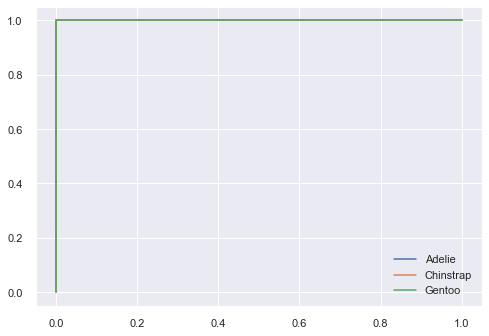

In [88]:
n_class = 3
fpr = {}
tpr = {}

for i in range(n_class):
    fpr[i],tpr[i], _ = roc_curve(y_test, y_test_proba[:,i], pos_label=i)
    grph = plt.plot(fpr[i], tpr[i])
    
grph
plt.legend({"Adelie":0, "Chinstrap":1, "Gentoo":2})

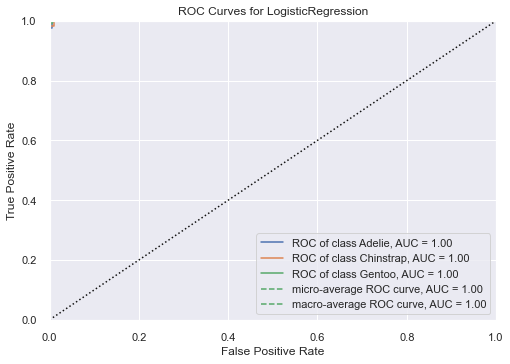

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [89]:
from yellowbrick import ROCAUC

vis = ROCAUC(model, classes=['Adelie', 'Chinstrap', 'Gentoo'])
vis.fit(X_train, y_train)
vis.score(X_train, y_train)
vis.show()

### Classification Report

In [90]:
cls_rep = classification_report(y_train,y_pred_tr)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       122
           1       1.00      0.98      0.99        54
           2       0.99      1.00      0.99        99

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [91]:
roc_score = roc_auc_score(y_test, y_test_proba,multi_class="ovr")
print(f"Roc score of the model is :- {roc_score}")

Roc score of the model is :- 1.0


In [92]:
model.intercept_

array([ -5.18787871, -14.77050164,  -7.78346341])

In [93]:
model.coef_

array([[ 1.43654744e+00, -3.23608960e-01,  4.84920818e-01,
         3.56462614e-02,  1.39199972e-01,  4.01556226e-01],
       [-4.99145435e-01,  3.62720795e-01,  3.83030996e-02,
        -2.41702743e-01, -4.20158301e-01, -6.40026596e-01],
       [-6.96121276e-01,  2.11948551e-02, -3.15651085e-01,
         2.06403222e-01,  2.01168493e-01, -8.01965361e-04]])

In [94]:
dataset.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [95]:
isd, bilm, bidm, fpl, bmg, sx = ['island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex']

In [103]:
dataset[dataset["bill_length_mm"] == 50]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
122,0,2,50,39,2,19,0
137,0,1,50,70,25,39,1
140,0,1,50,40,18,17,0


In [97]:
# def predc(isd, bilm, bidm, fpl, bmg, sx ):
#     pred = model.predict([[isd, bilm, bidm, fpl, bmg, sx]])
#     return pred[0]

# predc(0, 100, 27, 39, 73, 1)

In [98]:
import pickle
import os
model_path = "model"

if not os.path.exists(model_path):
    os.mkdir(model_path)

pickle.dump(model, open(f"{model_path}/model.pkl", "wb"))